# Selecting lambda and d for the whittaker smoother

The goal is to identify the smoothing parameters for the whittaker smoother that best reconstruct bands with manually created time gaps.

To do so, we will select the training data samples for which there is no gap larger than 30 days.

We will psuedo-generate random gaps in the imagery, apply the whittaker smoother with different lambda, d, and linear vs. median gap filling, and plot the reconstruction error on the imagery.

## Step 1. Identify training data samples that have gaps no larger than 30 days

In [1]:
import numpy as np
import os

In [2]:
%run ../../src/downloading/utils.py

In [24]:
files = [x for x in os.listdir("../../data/train-dates") if '.npy in x']

clean_data = []
for file in files:
    x = np.load('../../data/train-dates/' + file)
    if len(x) > 2:
        diffs = np.max(np.diff(x))
        if diffs < 21:
            clean_data.append(file)   

In [28]:
print(f"There are {len(clean_data)} files,"
      f" with {len(clean_data) * 48*48} px having a 20 day gap or less")

There are 152 files, with 350208 px having a 20 day gap or less


## Load training data, dates

In [367]:
import random
random_gap = 0.2


In [368]:
data = []
dates = []
for file in clean_data:
    data.append(np.load("../../data/train-raw/" + file))
    dates.append(np.load("../../data/train-dates/" + file))

In [370]:
clean_72 = np.empty((len(clean_data), 72, 48, 48, 10))
missing_72 = np.empty((len(clean_data), 72, 48, 48, 10))
indices = np.empty((len(clean_data), 2))

for item in range(len(data)):
    x, _ = calculate_and_save_best_images(data[item], np.array(dates[item]))
    clean_72[item] = x
    start = int(len(dates[item]) * 0.2)
    #start = random.sample(set(np.arange(2, (int(len(dates[item]) * 0.6)))), 1)[0]
    end = start + int(random_gap * len(dates[item]))
    indices[item, 0] = dates[item][start]
    indices[item, 1] = dates[item][end]  
    data[item] = np.delete(data[item], np.arange(start, end), 0)
    dates[item] = np.delete(dates[item], np.arange(start, end))    
    x, _ = calculate_and_save_best_images(data[item], np.array(dates[item]))
    missing_72[item] = x

Maximum time distance: 0
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 65
Maximum time distance: 0
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
Maximum time distance: 55
Maximum time distance: 0
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 75
Maximum time distance: 0
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [

Maximum time distance: 0
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 80
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[19, 20, 21] [19, 20, 21]
[19, 20, 21] [19, 20, 21]
[19, 20, 21] [19, 20, 21]
[19, 20, 21] [19, 20, 21]
[19, 20, 21] [19, 20, 21]
[19, 20, 21] [19, 20, 21]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]


[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
Maximum time distance: 75
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[35, 36, 37] [35, 36, 37]
[35, 36, 37] [35, 36, 37]
[35, 36, 37] [35, 36, 37]
[35, 36, 37] [35, 36, 37]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[4, 5, 6] [7, 8, 9]
[4, 5, 6] [7, 8, 9]
[4, 5, 6] [7, 8, 9]
[4, 5, 6] [7, 8, 9]
[28, 29, 30] [28, 29, 30]
[28, 29, 30] [28, 29, 30]
[28, 29, 30] [28, 29, 30]
[28, 29, 30] [28, 29, 30]
Maximum time distance: 45
[0, 1, 2] [0, 1, 2]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9]

[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 80
Maximum time distance: 0
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
Maximum time distance: 60
Maximum time distance: 0
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
Maximum time distance: 80
Maximum time distance: 0
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12,

[0, 1, 2] [0, 1, 2]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
Maximum time distance: 60
[0, 1, 2] [0, 1, 2]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
[5, 6, 7] [8, 9, 10]
Maximum time distance: 90
[0, 1, 2] [0, 1, 2]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 75
Maximum time distance: 0
[9, 10, 11] [12, 13, 

[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[4, 5, 6] [7, 8, 9]
[4, 5, 6] [7, 8, 9]
[4, 5, 6] [7, 8, 9]
[4, 5, 6] [7, 8, 9]
[27, 28, 29] [27, 28, 29]
[27, 28, 29] [27, 28, 29]
[27, 28, 29] [27, 28, 29]
[27, 28, 29] [27, 28, 29]
Maximum time distance: 40
[0, 1, 2] [0, 1, 2]
Maximum time distance: 0
[0, 1, 2] [0, 1, 2]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9] [10, 11, 12]
[7, 8, 9]

[0, 1, 2] [0, 1, 2]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 70
Maximum time distance: 0
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
[8, 9, 10] [11, 12, 13]
Maximum time distance: 65
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[0, 1, 2] [0, 1, 2]
[25, 26, 27] [25, 26, 27]
[25, 26, 27] [25, 26, 27]
[25, 26, 27] [25, 26, 27]
[25, 26, 27] [25, 26, 27]
[25, 26

In [72]:
x = np.load("../../data/train-raw/138872337.npy")
dates = np.load("../../data/train-dates/138872337.npy")
                
    
    

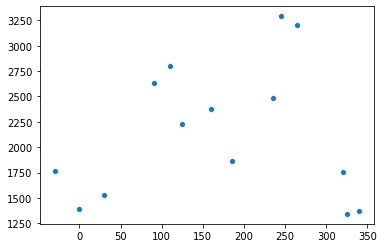

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


sns.scatterplot(dates, x[:, 22, 22, 0])

Maximum time distance: 90


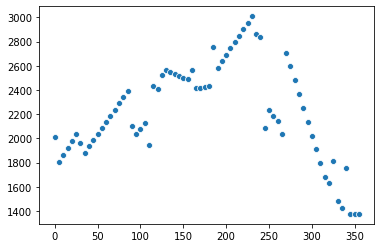

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

x, _ = calculate_and_save_best_images(x, dates)
#sm = Smoother(lmbd = 800, size = 72, d = 2, nbands = 10, dim = 48)
#x = sm.interpolate_array(x)
l = sns.scatterplot([x for x in range(0, 360, 5)], x[:, 22, 22, 0])
#l.set(ylim = (1800, 8500))

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

n = 24
sns.scatterplot([x for x in range(72)], clean_72[n, :, 22, 22, 0])

NameError: name 'clean_72' is not defined

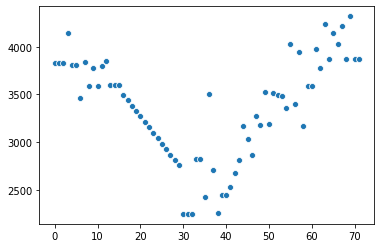

In [439]:
sns.scatterplot([x for x in range(72)], missing_72[n, :, 22, 22, 0])

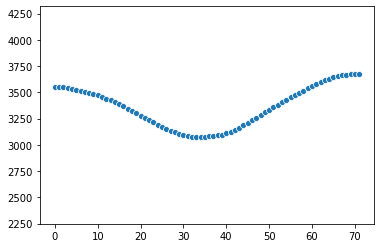

In [451]:
g = sns.scatterplot([x for x in range(72)], interpolated_72[n, :, 22, 22, 0])
g = g.set(ylim=(np.min(missing_72[n, :, 22, 22, 0]), np.max(missing_72[n, :, 22, 22, 0])))

### Calculate the initial error

In [456]:
errors = np.empty((len(clean_72), 48, 48, 10))
for sample in range(len(clean_72)):
    start, end = indices[sample]
    start = int(start // 5)
    end = int(end // 5)
    clean = clean_72[sample, start:end, ...]
    missing = missing_72[sample, start:end, ...]
    errors[sample] = np.mean(abs(clean - missing), axis = 0)


In [457]:
# Linear, 50%
np.mean(errors)

785.0835049259533

# Apply whittaker smoother to the data

In [99]:
import numpy as np
import scipy.sparse as sparse
import scipy
from scipy.sparse.linalg import splu
import multiprocessing


class Smoother:

    def __init__(self, lmbd, size, d = 2, nbands = 14, dim = 128):
        self.lmbd = lmbd
        self.size = size
        self.nbands = nbands
        self.dim = dim
        diagonals = np.zeros(2*d+1)
        diagonals[d] = 1.
        for i in range(d):
            diff = diagonals[:-1] - diagonals[1:]
            diagonals = diff
        offsets = np.arange(d+1)
        shape = (self.size-d, self.size)
        E = sparse.eye(self.size, format = 'csc')
        D = scipy.sparse.diags(diagonals, offsets, shape)
        D = D.conj().T.dot(D) * self.lmbd
        coefmat = E + D
        self.splu_coef = splu(coefmat)

    def smooth(self, y: np.ndarray) -> np.ndarray:
        ''' 
        Apply whittaker smoothing to a 1-dimensional array, returning a 1-dimensional array
        '''
        return self.splu_coef.solve(np.array(y))


    def interpolate_array(self, x) -> np.ndarray:
        x = np.reshape(x, (self.size, self.dim*self.dim*self.nbands))
        x = self.smooth(x)
        x = np.reshape(x, (self.size, self.dim, self.dim, self.nbands))        
        return x



In [452]:
lmbd = 200

interpolated_72 = np.copy(missing_72)
sm = Smoother(lmbd = lmbd, size = 72, d = 2, nbands = 10, dim = 48)

In [453]:
errors = np.empty((len(clean_72), 48, 48, 10))
errors_all = np.empty((len(clean_72)))
for sample in range(len(clean_72)):
    start, end = indices[sample]
    start = int(start // 5)
    end = int(end // 5)
    clean = clean_72[sample, start:end, ...]
    out = sm.interpolate_array(missing_72[sample])
    interpolated_72[sample] = out
    missing = interpolated_72[sample, start:end, ...]
    errors[sample] = np.mean(abs(clean - missing), axis = 0)
    errors_all[sample] = np.mean(abs(clean_72[sample] - interpolated_72[sample]))

In [208]:
# lmbd 100, median
np.mean(errors, axis = (0, 1, 2))

array([ 595.74449436,  648.01850279,  870.17590528, 1159.2098907 ,
        877.20900755,  988.03608495, 1042.58676695, 1060.66874019,
       1127.60338911, 1229.50034573])

In [450]:
# Lmbd 200, linear, 20%, d = 1
print(np.mean(errors))

print(np.mean(errors_all))

962.253103222441
905.2286128704249


In [454]:
# Lmbd 200, linear, 20%
print(np.mean(errors))

print(np.mean(errors_all))

760.4173014115386
600.2514640829996


In [267]:
# Lmbd 200, linear, 30%
print(np.mean(errors))

print(np.mean(errors_all))

942.9689758599341
660.902884699242


In [363]:
# Lmbd 400, linear, 50%
print(np.mean(errors))

print(np.mean(errors_all))

1272.7881872027044
890.4861709635205


In [360]:
# Lmbd 200, linear, 50%
print(np.mean(errors))

print(np.mean(errors_all))

1273.328156309246
879.9339755570811


In [319]:
# Lmbd 800, linear, 50%
print(np.mean(errors))

print(np.mean(errors_all))

1273.4818320513868
901.5891212329773


In [334]:
# Lmbd 800, median, 50%
print(np.mean(errors))

print(np.mean(errors_all))

1319.1627672647246
933.4447589831134
